# `hw1`: Exploration of pulse oximetry data

Deadline: **Monday, November 4, 11:59 PM**. 
- Submit your completed notebook on your personal Github repository created when accepting the assignment.
- All cells must be executable and their outputs should not be erased before submission.
- Homeworks are carried out *individually*.

In [21]:
# Fill in this cell with your personal details:
# - Name: Yang Lei
# - Student ID: s201670
# - Email: Lei.Yang@student.uliege.be

In this homework, you will have to load, clean, and explore pulse oximetry data from the [ OpenOximetry Repository](https://physionet.org/content/openox-repo/1.0.1). This dataset of oxygen desaturation studies notably includes oxygen saturation (SPO2 / SO2) measures from blood samples and unprocessed photoplethysmography (PPG) from pulse oximeters.

The goal of this first homework is to prepare the data and to perform some basic exploratory analysis. The same dataset will be used in the next homeworks, so it is important to understand the data and to prepare it properly.

All documentation about the dataset can be found on the dataset webpage and in the downloaded files.

First, create a [Physionet Account](https://physionet.org/register). Then, read and sign the [Data Use Agreement](https://physionet.org/sign-dua/openox-repo/1.0.1/). Finally, download the files in the [OpenOximetry Repository Files Section](https://physionet.org/content/openox-repo/1.0.1#files). Decompress the dataset in a directory named `data/` at the root of your project. Make sure to add `data/*` to your `.gitignore` file.

# Exercises

- Solve the exercises below by making the best use of the API offered in `numpy`, `pandas` and `matplotlib`.
- You will also need to use the `wfdb` library for reading and writing waveform data (see [WFDB Documentation](https://wfdb.readthedocs.io/en/latest/wfdb.html)).
- For plots, feel free to use `matplotlib`, `seaborn` or `pandas` built-in plotting functions.
- Follow the data visualization principles as best as possible to make your plots effective and readable.
- For each exercise, add Markdown cells to explain what you are doing and to discuss your results.

In [22]:
import warnings
import wfdb as wf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-success">
    
**Exercise**. Load the data from `data/patient.csv`, `data/encounter.csv`, and `data/bloodgas.csv` into dataframes. Visualise the raw data, understand the mearning of the different columns and values, drop or combine rows and columns if needed. Justify your choices.

The resulting dataframes should have unique values in columns `patient_id`, `encounter_id` and `('encounter_id', 'date', 'time')`, respectively. It may be preferable to merge columns `date` and `time` in a proper `datetime` column for the last dataframe.
    
</div>

<div class="alert alert-danger">
    
**Advice**. Read the dataset documentation in `data/OpenOximetry_Data_Dictionary_v1.0.0_*.csv`).
    
</div>

                                          patient_id          site_id  \
0  086c5bb6be06dd4fdb32f43233fb8a5116f3de7e3ca0a2...  ucsf-hypoxialab   
1  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...  ucsf-hypoxialab   
2  0b75db6465cdb03ae94230a424600db33f83317104b998...  ucsf-hypoxialab   
3  0c16265fcc7df3e899067e0e259b43e3751e2daa360d38...  ucsf-hypoxialab   
4  0d8e1b53092a588d5dd5e2f69090924326583b3ac6f04d...  ucsf-hypoxialab   

  assigned_sex   race  ethnicity  
0         Male      1        1.0  
1       Female    NaN        1.0  
2       Female  Asian        1.0  
3         Male     10        1.0  
4          NaN    NaN        1.0  
(144, 5)


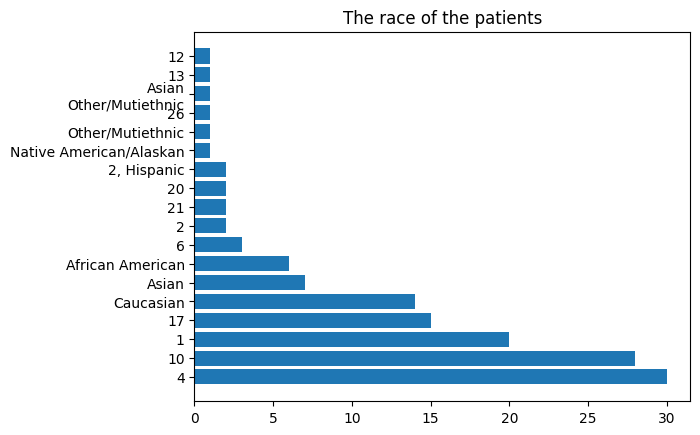

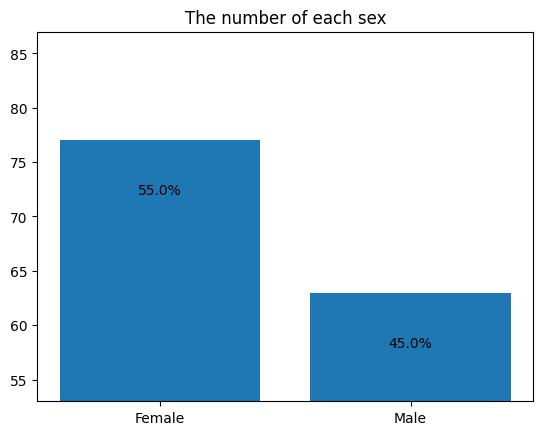

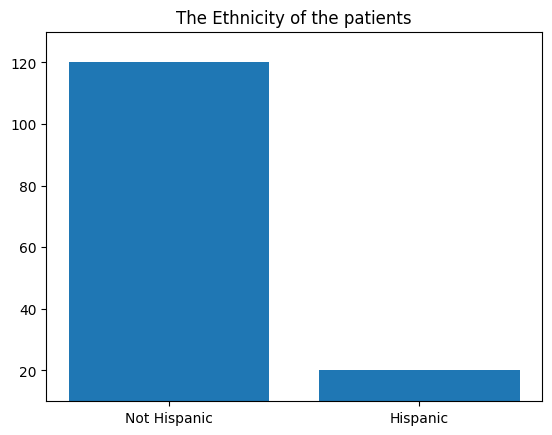

In [35]:
patient = pd.read_csv('data/patient.csv', sep=',', decimal='.')

print(patient.head())
print(patient.shape)
patient['race'] = patient['race'].dropna()

fig = plt.figure()
ax = plt.axes()
ax.barh(patient['race'].value_counts().index, patient['race'].value_counts().values)
plt.title("The race of the patients")
plt.show()

patient = patient.drop(columns=['site_id','race'])
patient = patient.drop_duplicates(subset='patient_id', keep='first')
patient = patient.dropna()
ax = plt.axes()

sex_counts = patient['assigned_sex'].value_counts()
ax.bar(sex_counts.index, sex_counts.values)
ax.set_ylim((sex_counts.values.min() )- 10, (sex_counts.values.max()) + 10)
for index, value in enumerate(sex_counts.values):
    percentage = (value / sex_counts.sum()) * 100 
    ax.text(index, value - 5, f'{percentage:.1f}%', ha='center') 
plt.title("The number of each sex")
plt.show()

ax = plt.axes()
ax.bar(patient['ethnicity'].value_counts().index, patient['ethnicity'].value_counts().values)
ax.set_xticks([1, 2])
ax.set_xticklabels(["Not Hispanic", "Hispanic"])
ax.set_ylim(patient['ethnicity'].value_counts().values.min() - 10,patient['ethnicity'].value_counts().values.max() + 10)
plt.title("The Ethnicity of the patients")
plt.show()

patient['ethnicity'] = patient['ethnicity'].replace({1: 0, 2: 1}).astype(int)
patient['assigned_sex'] = patient['assigned_sex'].replace({'Male': 0, 'Female': 1}).astype(int)


Firstly, I decided to decompose the different dataframes into multiple cells. After loading the patient table and looking at the documentation of those data.Let's looking at each column and adding a explanation to each one with the help of some printing information:

Patient_id is the unique identifier who has been hashed for anonymously can't do anything on it 
I decided to remove "site_id" because this is a unique same value for the all rows.(ucsf-hypoxialab)

For the next 3 columns, we need to adapt a strategy to avoid having a false representation of the dataset By this logic, This is better to remove the row with no information instead to try to guess the information or assign a arbitrary value.

The column race is messed up with a lot of weird things such as number or number and race at the same time and this represent more than 70% of the dataset so removing the row with affect the size of the dataset very much, so the idea can be fix a default value such as "Other/Multietnic" who has been documented or let the value such as this but not understanding the meaning of it or removing the column. So the solution that I decide is removing this problematic column.

For the ethnicity, we have 2 values documented "1, Not Hispanic 2, Hispanic" so when we have 2 values we can transform it into binary classifier. There are more than 6 mores times of Not hispanic people than Hispanic people who are represented.

For the gender, we have also 2 values documented "Male,Female" for the next computation process we can tranform the Male into 0 and the Female into 1. There are near the same number of Female 55% and Male 45% but we need to take care of the size of the dataset who is relatively small.


                                          patient_id  \
0  850f264f00c818ca0112781cc020ed42f9f83409e82ecd...   
1  e57c8296e892af1eb3833849501700b06fdfb5d7a5385a...   
2  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
3  244e495a1195bb5a7443e8f3fa095c67363861e02081e4...   
4  79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   

                                        encounter_id encounter_date  \
0  010127ad5b956a85fcd298cee3290455908f5857aea0e4...     2173-02-18   
1  01b0a887f76a3f77a708ccff97cabb16b223e572c4bfd1...     2174-02-21   
2  0218aa199ef6e05f9cb938222abf2d2a25d7214e34f9cc...     2223-02-07   
3  0241a26f4be08b7312eab3099fb7e044376d7d433d69cc...     2151-12-19   
4  026237b8b5542bcc94e106231d499ee3bae833633c4d06...     2223-05-23   

   age_at_encounter  warming  fitzpatrick monk_fingernail monk_dorsal  \
0              34.0      NaN          1.0             NaN         NaN   
1              29.0      NaN          5.0             NaN         NaN   
2              23

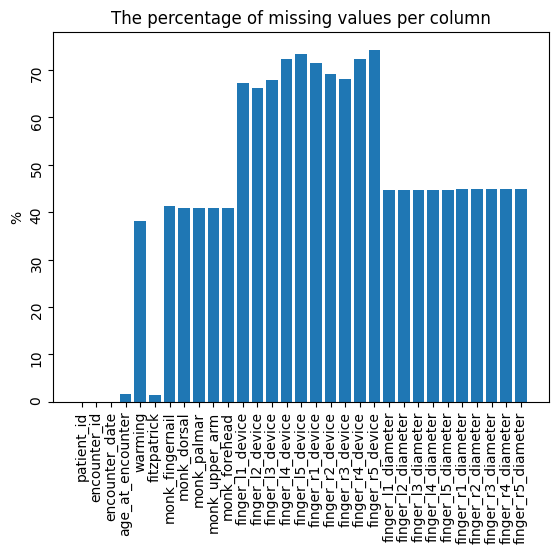

(278, 4)


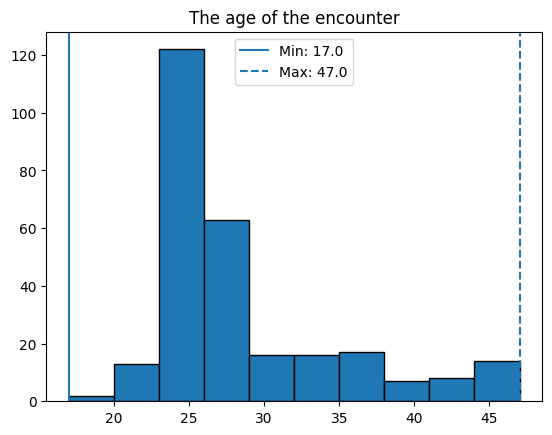

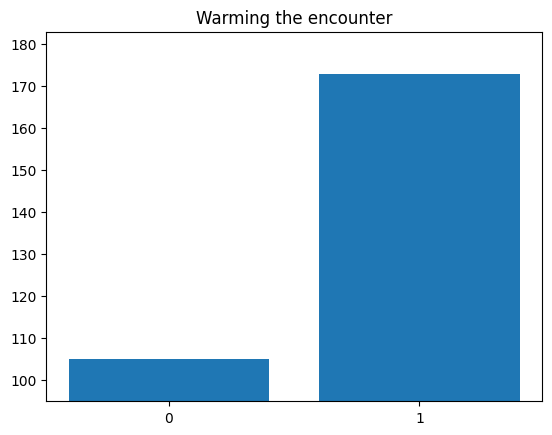

In [ ]:
encounter = pd.read_csv('data/encounter.csv', sep=',', decimal='.',)

print(encounter.head())
print(encounter.shape)

fig = plt.figure()
ax = plt.axes()
ax.bar(encounter.columns, encounter.isna().sum() / encounter.shape[0] * 100)
plt.xticks(rotation=90)
plt.ylabel("%")
plt.title("The percentage of missing values per column")
plt.show()

encounter = encounter[encounter.columns[:5]]
encounter = encounter.drop(columns=['encounter_date'])
encounter = encounter.drop_duplicates(subset='encounter_id', keep='first')
encounter = encounter.dropna()
print(encounter.shape)

ax = plt.axes()
ax.hist(encounter['age_at_encounter'], bins=10,edgecolor='black')
min_age = encounter['age_at_encounter'].min()
max_age = encounter['age_at_encounter'].max()
ax.axvline(min_age, linestyle='-', label=f'Min: {min_age}')
ax.axvline(max_age, linestyle='--', label=f'Max: {max_age}')
plt.title("The age of the encounter")
plt.legend()
plt.show()
ax = plt.axes()
ax.bar(encounter['warming'].value_counts().index, encounter['warming'].value_counts().values)
ax.set_ylim((encounter['warming'].value_counts().values.min() )- 10, (encounter['warming'].value_counts().values.max()) + 10)
ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "1"])
plt.title("Warming the encounter")
plt.show()




In this dataframe, we are going to have a lot of columns in the dataset. Before removing the NaN values let explore the documentation to figure what columns are useful to use and what columns to remove. We are not going to use the columns with the protocols used or the id of the machine that will be used but this table is to join between the encounter and the bloodgas of each patient at the encounter 

So we pass into a dataframe from 466x31 into a dataframe from 281x5 by removing the NaN values and the useless columns. And the encounter date is something that we can have more precisely in another dataset. One of great questions is about to keep or not warming the encounter. Personnaly I decided to keep it to see it it will have some influence on others columns or not but it can be justified to be drop


The encounter_id is a unique id to identify the encounter can't say more information about it

The age of the patient calculated by date of birth - current date. We can say we are going to study people from 17 to 47 years old and with a majority of between 20 and 30 years old. 

The warming is a boolean value where we can see there is more warming than no warming.


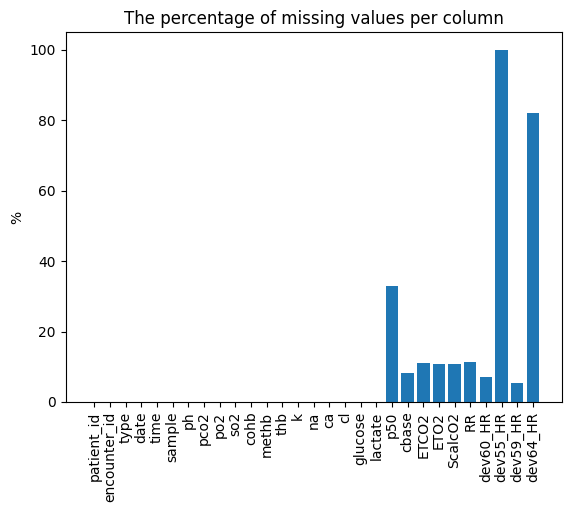

                                         encounter_id            datetime  \
26  0274ff212eab782d3a29b533b78a051984a04469844659... 2169-04-13 13:55:00   
28  0274ff212eab782d3a29b533b78a051984a04469844659... 2169-04-13 13:57:00   
29  0274ff212eab782d3a29b533b78a051984a04469844659... 2169-04-13 14:06:00   
30  0274ff212eab782d3a29b533b78a051984a04469844659... 2169-04-13 14:00:00   
34  0274ff212eab782d3a29b533b78a051984a04469844659... 2169-04-13 13:52:00   

    sample     ph  pco2   po2   so2  cohb  methb   thb    k     na    ca  \
26     9.0  7.410  36.2  50.4  85.6   1.1    0.4  12.2  4.1  139.0  1.15   
28    11.0  7.412  36.3  44.7  80.5   1.0    0.4  12.2  4.0  139.0  1.16   
29    15.0  7.417  35.1  60.0  91.5   1.1    0.3  12.3  4.0  140.0  1.15   
30    13.0  7.409  37.0  39.0  72.7   1.1    0.4  12.3  4.0  139.0  1.16   
34     7.0  7.411  35.2  66.2  93.7   1.0    0.3  12.0  4.0  139.0  1.15   

       cl  glucose  lactate    p50  cbase      ETCO2       ETO2    ScalcO2  \
26

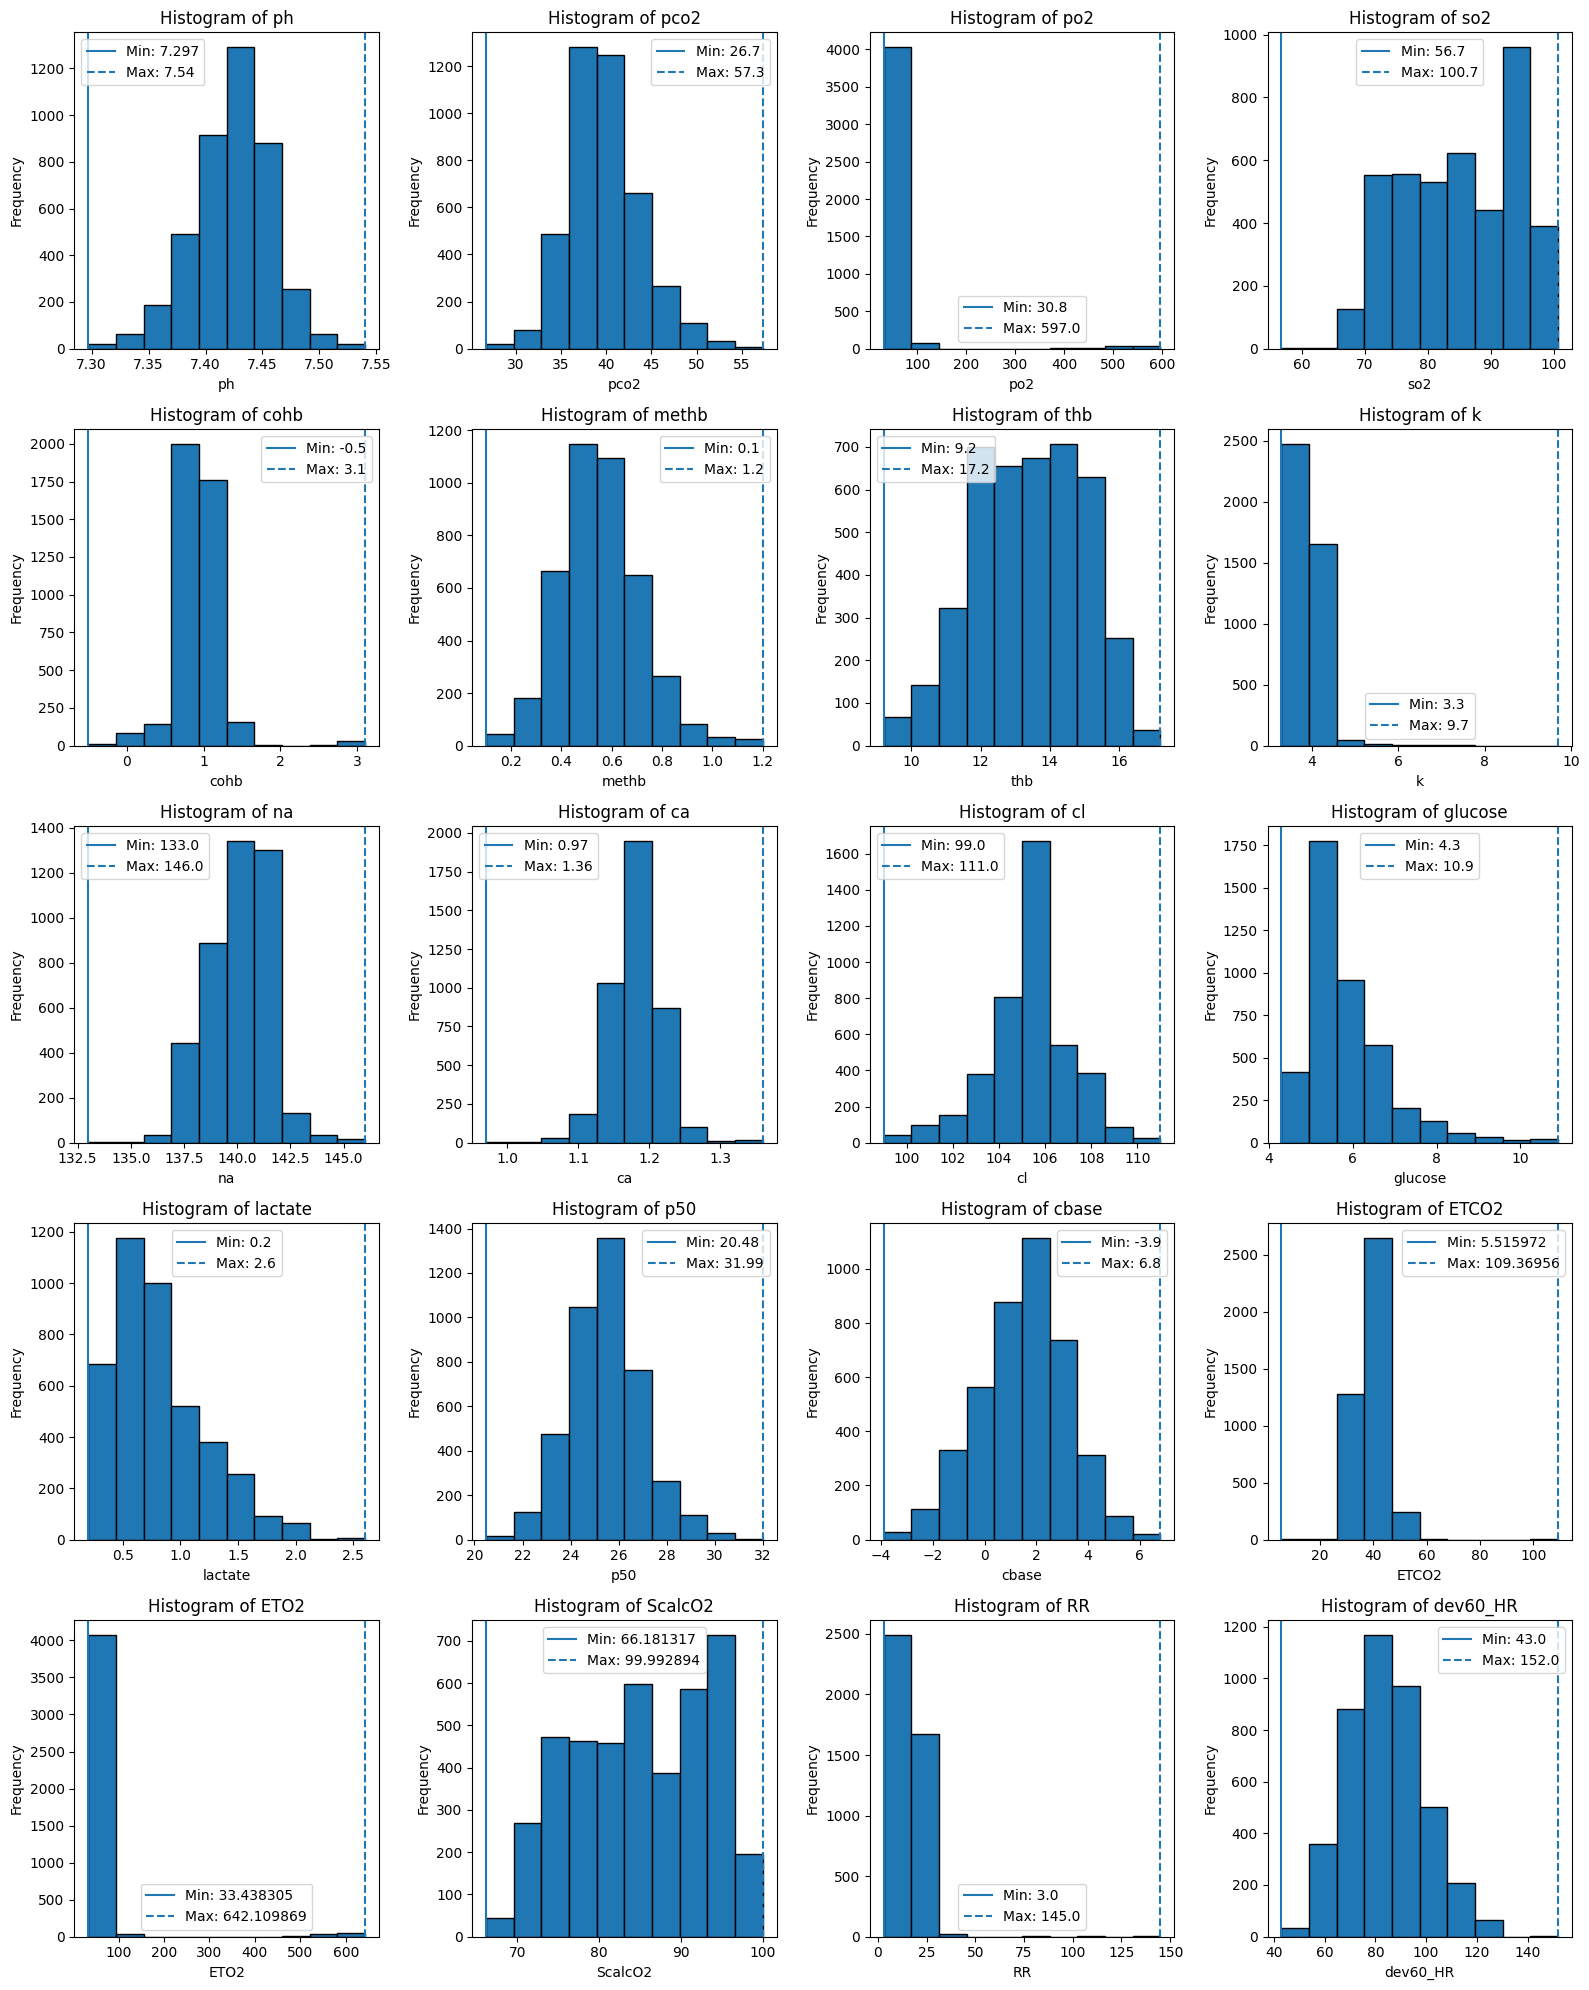

: 

In [ ]:
bloodgas = pd.read_csv('data/bloodgas.csv', sep=',', decimal='.')

fig = plt.figure()
ax = plt.axes()
ax.bar(bloodgas.columns, bloodgas.isna().sum() / bloodgas.shape[0] * 100)
plt.xticks(rotation=90)
plt.ylabel("%")
plt.title("The percentage of missing values per column")
plt.show()
bloodgas['datetime'] = pd.to_datetime(bloodgas['date']+' '+bloodgas['time'])
bloodgas = bloodgas.drop(columns= ['dev55_HR','type','date','time','patient_id','dev64_HR'])


reindex = bloodgas.pop('datetime')
bloodgas.insert(1, reindex.name, reindex)
#bloodgas2 = bloodgas.copy()
bloodgas = bloodgas.dropna()
bloodgas = bloodgas.drop_duplicates(subset=['datetime','encounter_id'], keep='first')

print(bloodgas.head())
print(bloodgas.shape)

fig, axs = plt.subplots(5, 4, figsize=(16, 20))
axs = axs.flatten()  

# Loop over each column to plot
for i, column in enumerate(bloodgas.columns[3:23]):  
    ax = axs[i]  
    ax.hist(bloodgas[column], bins=10, edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    min_value = bloodgas[column].min()
    max_value = bloodgas[column].max()
    ax.axvline(min_value, linestyle='-', label=f'Min: {min_value}')
    ax.axvline(max_value, linestyle='--', label=f'Max: {max_value}')
    ax.legend()

plt.tight_layout()
plt.show()
# Looking after the distribution of the data when i don't remove na values

#fig, axs = plt.subplots(5, 4, figsize=(16, 20))
#axs = axs.flatten()  

#for i, column in enumerate(bloodgas2.columns[3:23]):  
#    ax = axs[i]  
#    ax.hist(bloodgas2[column], bins=10, edgecolor='black')
#   ax.set_title(f'Histogram of {column}')
#   ax.set_xlabel(column)
#   ax.set_ylabel('Frequency')
#    min_value = bloodgas2[column].min()
#    max_value = bloodgas2[column].max()
#    ax.axvline(min_value, linestyle='-', label=f'Min: {min_value}')
#    ax.axvline(max_value, linestyle='--', label=f'Max: {max_value}')
#    ax.legend()

#plt.tight_layout()
#plt.show()


Firstly, I load the dataset into a dataframe and Try to remove the Nan values from the dataframe there is an issue if it is done like this we are going to lose all the rows. So let explore the columns to find a suspect one. By finding the column "dev55_HR" where all the values are Nan so this will give us any information removing also the column "type" where all the information so this will not give us any information and also removing the column "patient_id" because we have already the information on the other dataframe And combine the date and time into datetime format.And Finally removing the "dev64_HR" from the dataframe because there are no documentation about it and this machine has also a lot of Nan values and will bias the dataframe , 82% of this column is empty and I presume this column will give us also Heart rate by a machine having already 2 machines who do this work one more with no give a huge difference and I prefer to preserve the number of rows than the precision of Heart Rate .After this just remove the Nan values.


So now , let explore the differents columns with values in the dataframe,those columns can tell us the concentration of some molecules and machines for each patient at different times. we can see that some distribution looks like the same and we are going to have multiple different types of distributions.  Maybe, we will find some correlations between those columns later for the datasets.

There are somes columns with the data will follow some gaussian distribution such as : "dev59_HR", "dev60_HR", "ca", "cl".

There are other columns with the data will follow or Gamma a Poisson distribution such as : "RR, ETO2,k,lactate"

Or maybe some columns with a unknow distribution such as :"ScalcO2,thb,so2"

We are going to more information about later but also we can observe some outliers value such as we are going to big concentration in the left side for "RR , ETO2" and some points far away on the right so we will process them later.


<div class="alert alert-success">
    
**Exercise**. Now that the dataset have been loaded with unique identifier columns, merge them appropriately. Then, only select the following columns: `
    'encounter_id', 'patient_id', 'datetime', 'sample', 'assigned_sex', 'race', 'ethnicity', 'age_at_encounter', 'warming', 'ph', 'pco2', 'po2', 'so2', 'cohb', 'methb', 'thb', 'k', 'na', 'ca', 'cl', 'glucose', 'lactate', 'p50', 'cbase', 'ETCO2', 'ETO2', 'ScalcO2', 'RR', 'dev55_HR', 'dev59_HR', 'dev60_HR', 'dev64_HR', 'type'`.

</div>

In [26]:
data = pd.merge(patient, encounter, on='patient_id')
data= pd.merge(data, bloodgas, on='encounter_id')

#print(data)

Simply doing a merge by using inner join on the 3 dataframes to create the new dataframe from the dataset

<div class="alert alert-success">
    
**Exercise**. If necessary, filter the data to remove outliers or abnormal values. Explain your approach and rationale.

</div>

In [27]:
#By doing this outliers detections 
def quartiles_method(Data):
    Data = Data.apply(pd.to_numeric, errors='coerce')

    for column in Data.columns:
        tempo = Data[column]
        q1 = tempo.quantile(0.25)
        q3 = tempo.quantile(0.75)
        lower = q1 - 1.5 * (q3 - q1)
        upper = q3 + 1.5 * (q3 - q1)
        Data = Data[Data[column] >= lower] 
        Data = Data[Data[column] <= upper]
    return Data

# Doing a Z-score method to remove the outliers
def zscore_method(Data):
    Data = Data.apply(pd.to_numeric, errors='coerce')
    z = np.abs((Data - Data.mean()) / Data.std())
    Data = Data[(z < 3).all(axis=1)]
    return Data
    
# Not using all columns 
id = ['patient_id', 'encounter_id', 'datetime']
data_id = data[id]

data_value = data.drop(columns=id)

print(data_value.shape)
first_method = quartiles_method(data_value)
second_method = zscore_method(data_value)
print(first_method.shape, second_method.shape)

data_value = second_method
dataset = pd.concat([data_id.loc[second_method.index], second_method], axis=1)

(3671, 26)
(1867, 26) (3296, 26)


To remove outliers data, we can use the method of quartiles to determine the abnormal values in the dataset and supress the row.

Min {y(i)| y(i) >= Q(0.25 - 1.5[Q(0.75)- Q(0.25)])}

Max {y(i)| y(i) =< Q(0.25 - 1.5[Q(0.75)- Q(0.25)])}

But this method was too aggresive to be used so instead of using it. I use the Z-score to calculate the deviation between Data and the mean divide by the standard deviation and by choosing z < 3 99.7% of our data will be there and just removing the outliers data. So we are going to pass from 3671 rows into 3296 rows by using this method and only removing the biggest outliers data. Also we can remove from the z-score detection assigned_sex,ethnicity and warming because those are binary variables but it doesn't affect the final result so I let it to avoid to recombine it after

<div class="alert alert-success">
    
**Exercise**. Compute descriptive or summary statistics of each individual column of the dataset. Comment on the results.
    
</div>

,assigned_sex,ethnicity,age_at_encounter,warming,sample,ph,pco2,po2,so2,cohb,methb,thb,k,na,ca,cl,glucose,lactate,p50,cbase,ETCO2,ETO2,ScalcO2,RR,dev60_HR,dev59_HR
count,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000
mean,0.618022,0.104976,27.471177,0.647755,14.022451,7.425795,39.437197,52.681371,84.673695,0.927822,0.561135,13.160892,3.886438,139.970570,1.181104,105.207828,5.778004,0.787075,25.364794,1.451851,38.918305,55.862632,84.886424,13.400789,84.254551,83.996359
std,0.485945,0.306569,6.162229,0.477742,7.246460,0.032111,3.703380,14.980842,8.725409,0.198323,0.140486,1.500212,0.243323,1.378366,0.033058,1.871002,0.846332,0.356151,1.401186,1.637980,4.193206,15.519818,7.964495,6.396925,14.755256,14.648993
min,0.000000,0.000000,17.000000,0.000000,1.000000,7.325000,28.200000,30.800000,64.000000,0.100000,0.200000,9.300000,3.300000,136.000000,1.080000,100.000000,4.300000,0.200000,21.070000,-3.500000,25.614353,34.770175,66.181317,3.000000,47.000000,47.000000
25%,0.000000,0.000000,23.000000,0.000000,8.000000,7.404000,37.000000,40.300000,76.875000,0.800000,0.500000,11.900000,3.700000,139.000000,1.160000,104.000000,5.200000,0.500000,24.470000,0.400000,36.235926,43.762880,78.065237,8.000000,74.000000,73.750000
50%,1.000000,0.000000,25.000000,1.000000,14.000000,7.428000,39.200000,47.800000,85.100000,0.900000,0.600000,13.200000,3.900000,140.000000,1.180000,105.000000,5.600000,0.700000,25.340000,1.600000,38.488226,51.047255,85.146964,9.000000,83.000000,83.000000
75%,1.000000,0.000000,28.000000,1.000000,20.000000,7.447000,41.600000,63.200000,93.100000,1.100000,0.600000,14.500000,4.000000,141.000000,1.200000,107.000000,6.200000,1.000000,26.240000,2.600000,41.216954,65.951090,92.418821,20.000000,95.000000,94.000000
max,1.000000,1.000000,47.000000,1.000000,30.000000,7.525000,51.500000,115.000000,99.300000,1.700000,1.000000,16.800000,4.700000,144.000000,1.290000,110.000000,8.900000,1.900000,29.880000,6.400000,52.753128,278.497291,99.929498,30.000000,129.000000,128.000000


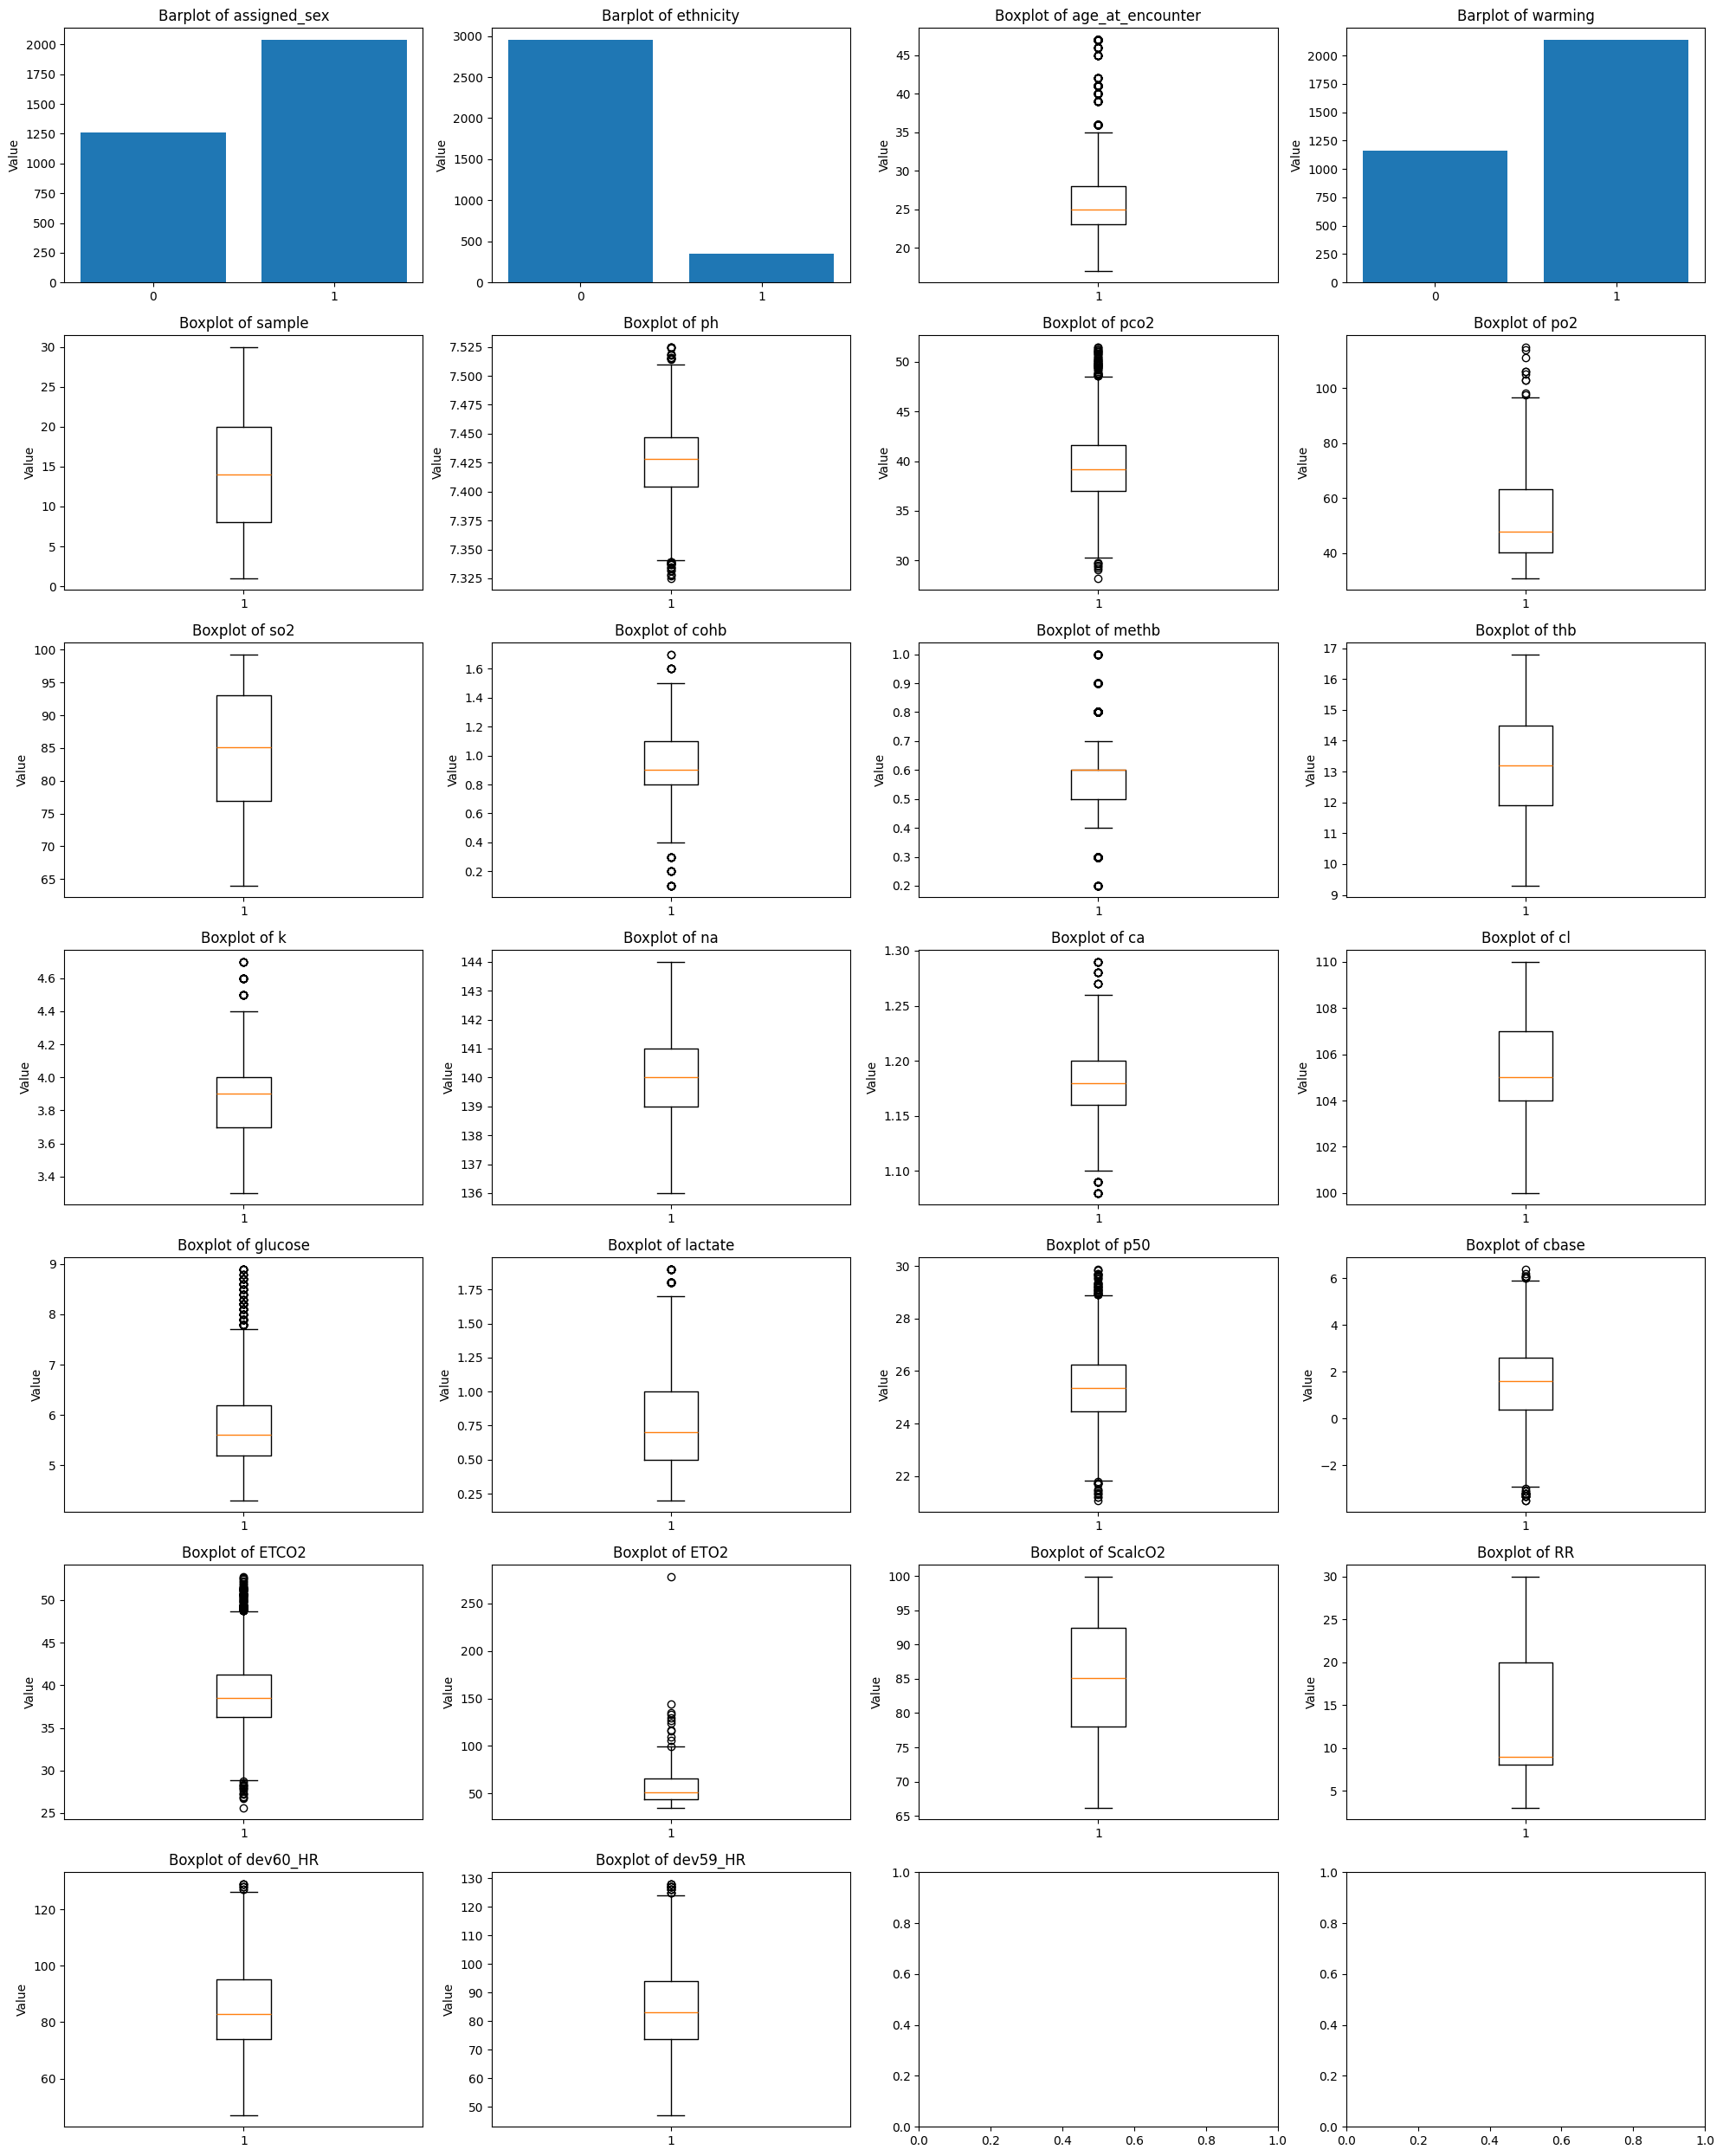

In [28]:
pd.set_option('display.max_columns', None) 
display(data_value.describe())

fig, axs = plt.subplots(7, 4, figsize=(20, 25))
axs = axs.flatten() 

for i, column in enumerate(data_value.columns):
    ax = axs[i] 
    col_index = data_value.columns.get_loc(column)
    if not (col_index == 0 or col_index == 1 or col_index == 3):
        ax.boxplot(data_value[column])
        ax.set_title(f'Boxplot of {column}')
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(["0", "1"])
        ax.bar(data_value[column].value_counts().index, data_value[column].value_counts().values)
        ax.set_title(f'Barplot of {column}')
    ax.set_ylabel('Value')


plt.tight_layout()
plt.show()


We can say that, we are going to do the computation for 26 columns with 3296 values for each one who has been removing the most outliers values. 

For 3 columns : Warming,Ethnicity and assigned_sex are binary values, The means will represent the percentage of 1 values in each column and we are going , we need to take care about the size when we are going to work with huge difference between 0 and 1.It can bias our interpretation.

For the rest of the columns : we are going to work with different scales present such as "lactate" where we are going to work with decimals or "dev59_HR" where the difference between min and max will with bggest number of values. One way to visualize the result of the computation statics is with boxplot which will give us median,25%,... We can see the repartition of the data with the boxplot the range of the quartiles and also because of the strategies of z-score, we can see there are outliers values in the perspective of the quartiles method. 

Some columns don't have outliers values such as :"RR,"ScalcO2","na","cl","thb","so2","sample".And In the other hand, we have some columns that have outliers values so we need to see it those values are "normal" in the sense for example if a person has heatlhcare problem or issues with the equipments.

By having those stats, we can look after the normal statistics from Internet or a book to see if those stats are consistent or not. So we can look for example with pH is normally between 7.35 and 7.45 we can look at the min and max values and the mean values of our stastitics and it look like similar but the max is at 7.525 and the min at 7.325 and those values are not really differences and can be interpret such as ill patient or something else in the corpse to justify those values. And we can do the same process for the chemicals variables to see what it the normal statistics for a person should contain.


<div class="alert alert-success">
    
**Exercise**. Analyze and visualize the pairwise correlations between the columns of the dataset. Select an appropriate subset of the columns for which measuring correlations makes sense. Comment on some expected or unexpected correlations.

Next, by focusing on bloodsamples at index `sample=1`, `sample=5` and `sample=10` throughout the desaturation studies (decreasing saturation), display the scatter plots of some interesting variable pairs (e.g., oxygen saturation, age, sex, etc). Comment on the results.

</div>

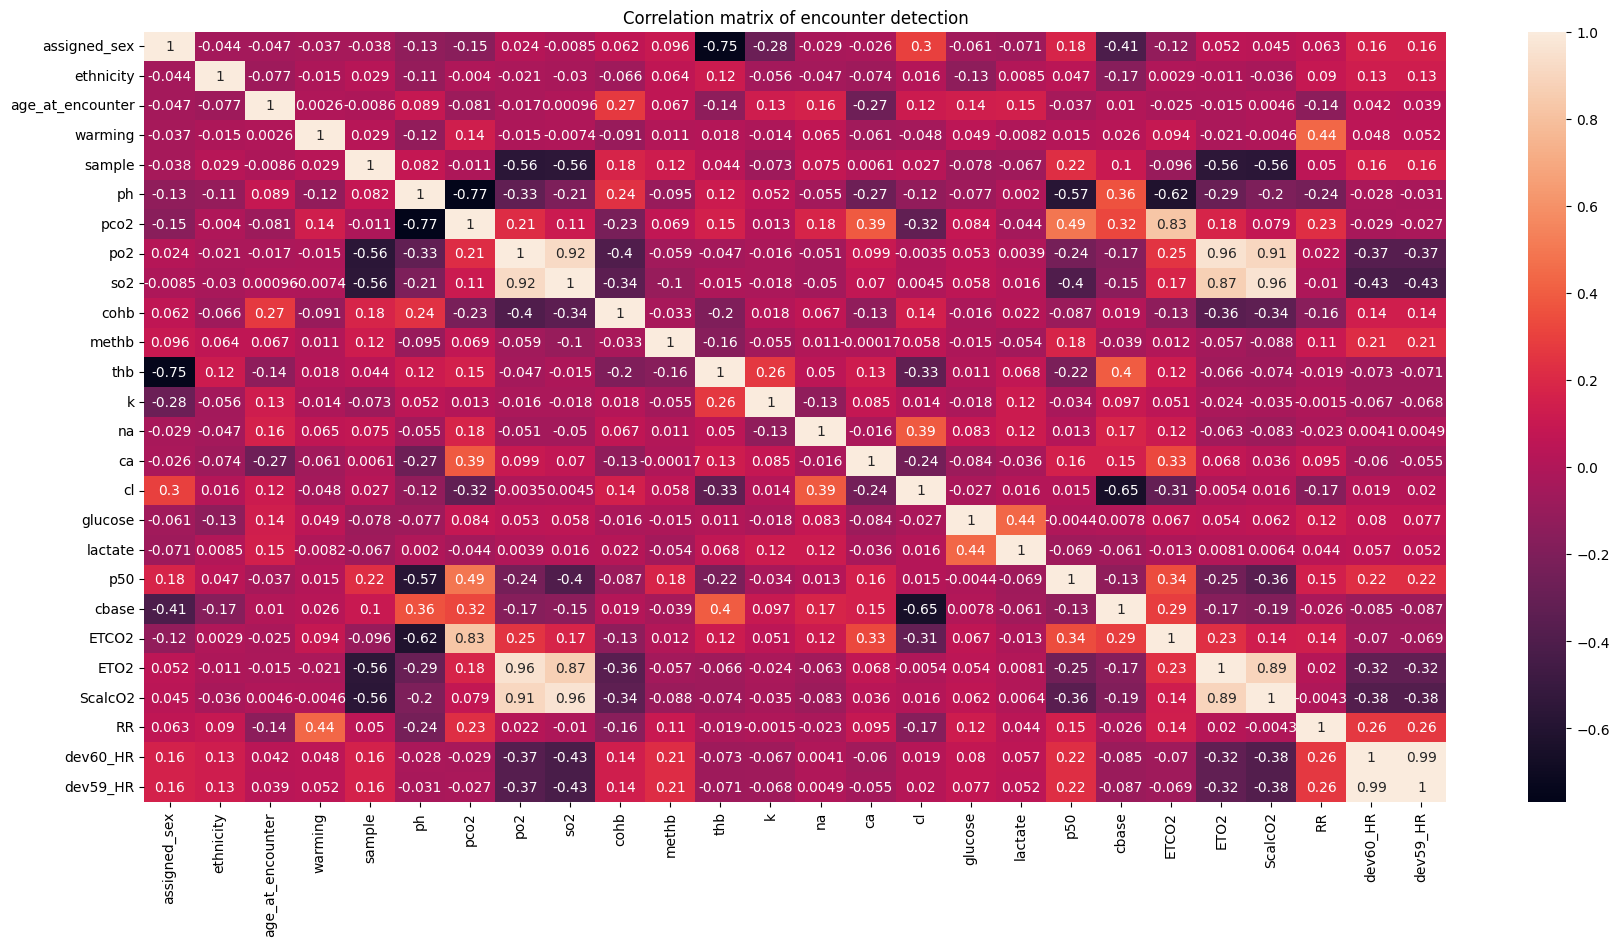

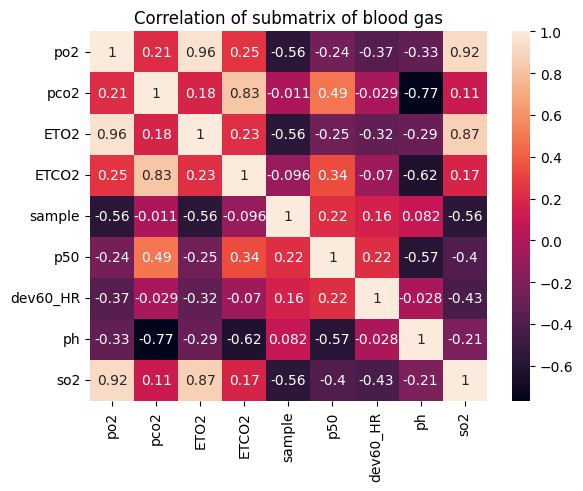

In [29]:
correlation_matrix = data_value.corr()

fig  = plt.figure(figsize=(21, 10))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation matrix of encounter detection')
plt.show()

subset = ['po2', 'pco2', 'ETO2', 'ETCO2','sample', 'p50','dev60_HR','ph','so2']

subdata = data_value[subset]

correlation_matrix2 = subdata.corr()

fig  = plt.figure()
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation of submatrix of blood gas')
plt.show()


We are going to look after the correlation matrix of patient with some interesting variable pairs: 

When we are going to have more than 0.70 or -0.70 we can say they are higly correlated positive or negative when one of them will increase or decrease the correlated column will also increase or decrease For example if the "pco2" variable will increase, the "ETCO2" will also increase. When they are correlated we can say there is a causality for example(eating glasses and having sunburns have a high correlation)

When we are going to have value between 0.50 and 0.70 or -0.50 and -0.70. We can say they are moderately correlated positive or negative when one of them will increase or decrease 
For example ph by the definition that I found online [ p50](https://derangedphysiology.com/main/cicm-primary-exam/required-reading/respiratory-system/Chapter%201131/p50-value-blood-gas-sample) : It is represented as p50, in contrast to the p50(st) which is an idealised value calculated from the measured PaO2 at a standard set of conditions (pH 7.40, pCO2 40mmHg, and assuming the absence of dyshaemoglobins). The normal p50 value is 24-28 mmHg. This p50 will need more to explain it such as pco2(0.49 very near 0.50) also.

When we are going to have value between 0.30 and 0.50 or -0.30 and -0.50. We can say that they are lowly correlated positive or negative like between p50 and ETCO2 so we can explain some with ETCO2 but not really a lot of information.

And when are going to have value near 0 we can say that they are not correlated means we can say anything when one will increase we can't predict the other variables

We are going to focus on the following variables : 'po2', 'pco2', 'ETO2', 'ETCO2','sample', 'p50','dev60_HR','ph','so2'.

In this subset,we are going to see between po2 , ETO2 and so2 they are highly positive correlated, we can expect this those variables will describe approximately the same notion. We can also say the same for pco2 and ETCO2.

I personally expected more negative correlation between the po2 and pco2 or ETO2 and ETCO2  more than 0.21 because when we are going to breath we are going to reject co2 and absorb o2. One other unexpected correlation is with sample where we are going to increase sample the o2 variables will decrease moderately.

The heart rate when will increase the o2 will tend to decrease this is not only just this factor,but we can say the heart need to pulse more because there is not enough oxygen






    assigned_sex  ethnicity  age_at_encounter  warming  sample     ph  pco2  \
2              1          0              46.0      1.0    10.0  7.462  38.5   
15             1          0              46.0      1.0     5.0  7.446  39.6   
40             1          0              47.0      1.0    10.0  7.435  36.1   
51             1          0              47.0      1.0     5.0  7.429  37.3   
67             1          0              47.0      1.0     5.0  7.410  40.9   

     po2   so2  cohb  methb   thb    k     na    ca     cl  glucose  lactate  \
2   38.7  76.2   1.0    0.7  12.1  4.6  143.0  1.09  106.0      4.9      0.6   
15  59.8  92.4   0.7    0.5  12.0  4.3  143.0  1.10  107.0      4.7      0.7   
40  38.4  74.1   1.2    0.7  10.7  3.7  141.0  1.09  106.0      7.8      1.1   
51  75.2  96.7   1.0    0.5  11.5  4.2  142.0  1.11  108.0      5.1      0.7   
67  58.1  91.0   1.0    0.5  11.3  3.8  144.0  1.11  107.0      8.4      1.0   

      p50  cbase      ETCO2       ETO2    Sc

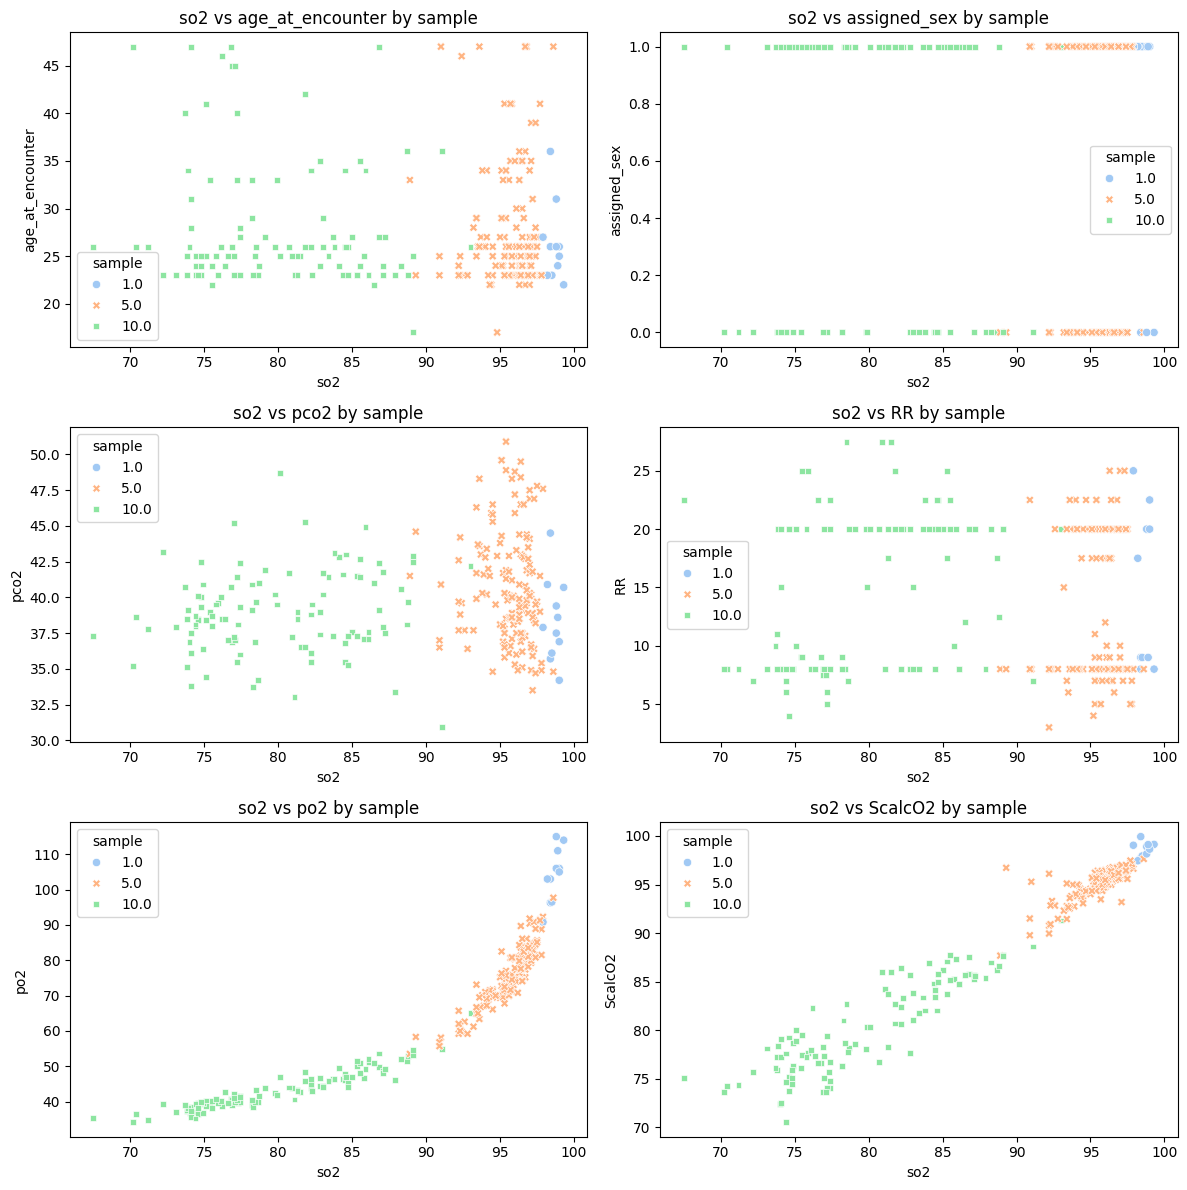

In [30]:
sample_data = data_value[data_value['sample'].isin([1, 5, 10])]

print(sample_data.head())

variables_of_interest = [
    ('so2', 'age_at_encounter'),
    ('so2', 'assigned_sex'),
    ('so2', 'pco2') ,
    ('so2','RR'),
    ('so2','po2'),
    ('so2', 'ScalcO2')
]

fig, axs = plt.subplots(3,2, figsize=(12, 12))
axs = axs.flatten()

# Plot each variable pair
for i, (x_var, y_var) in enumerate(variables_of_interest):
    ax = axs[i]
    sns.scatterplot(
        data=sample_data,
        x=x_var,
        y=y_var,
        hue='sample',
        style='sample',
        ax=ax,
        palette='pastel'
    )
    ax.set_title(f'{x_var} vs {y_var} by sample')
plt.tight_layout()
plt.show()

We can say that in each variable pair, the smallest value is always at the right position, the biggest occupy is at the left position, and the median value will occupies the position between the smallest and the biggest.

We can see 3 big clusters in those plots, each one for the different values of the sample. The size of each one is different the 10 will have the biggest, 5 will occupy less, and 1 will be a tiny cluster with the highest value for so2 where this variable represents Oxygen saturation, percent.

With any configuration we are going to have a story maybe we are going to correlate such as so2 and ScalcO2 or not but In the end, we are going to have some group that has been formed independently of the age,sex, warming or other parameters for the oxygen saturation 

<div class="alert alert-success">
    
**Exercise**. Select 10 encounters at random. For these encounters, display the evaluation of the saturated O2 blood samples during a desaturation test as a function of the relative time since the start of the desaturation. Give your observations.

</div>

<div class="alert alert-danger">
    
**Advice**. It may be useful to filter out encounters that have a too long duration (too large difference between the maximum datetime and minimum datetime).

</div>

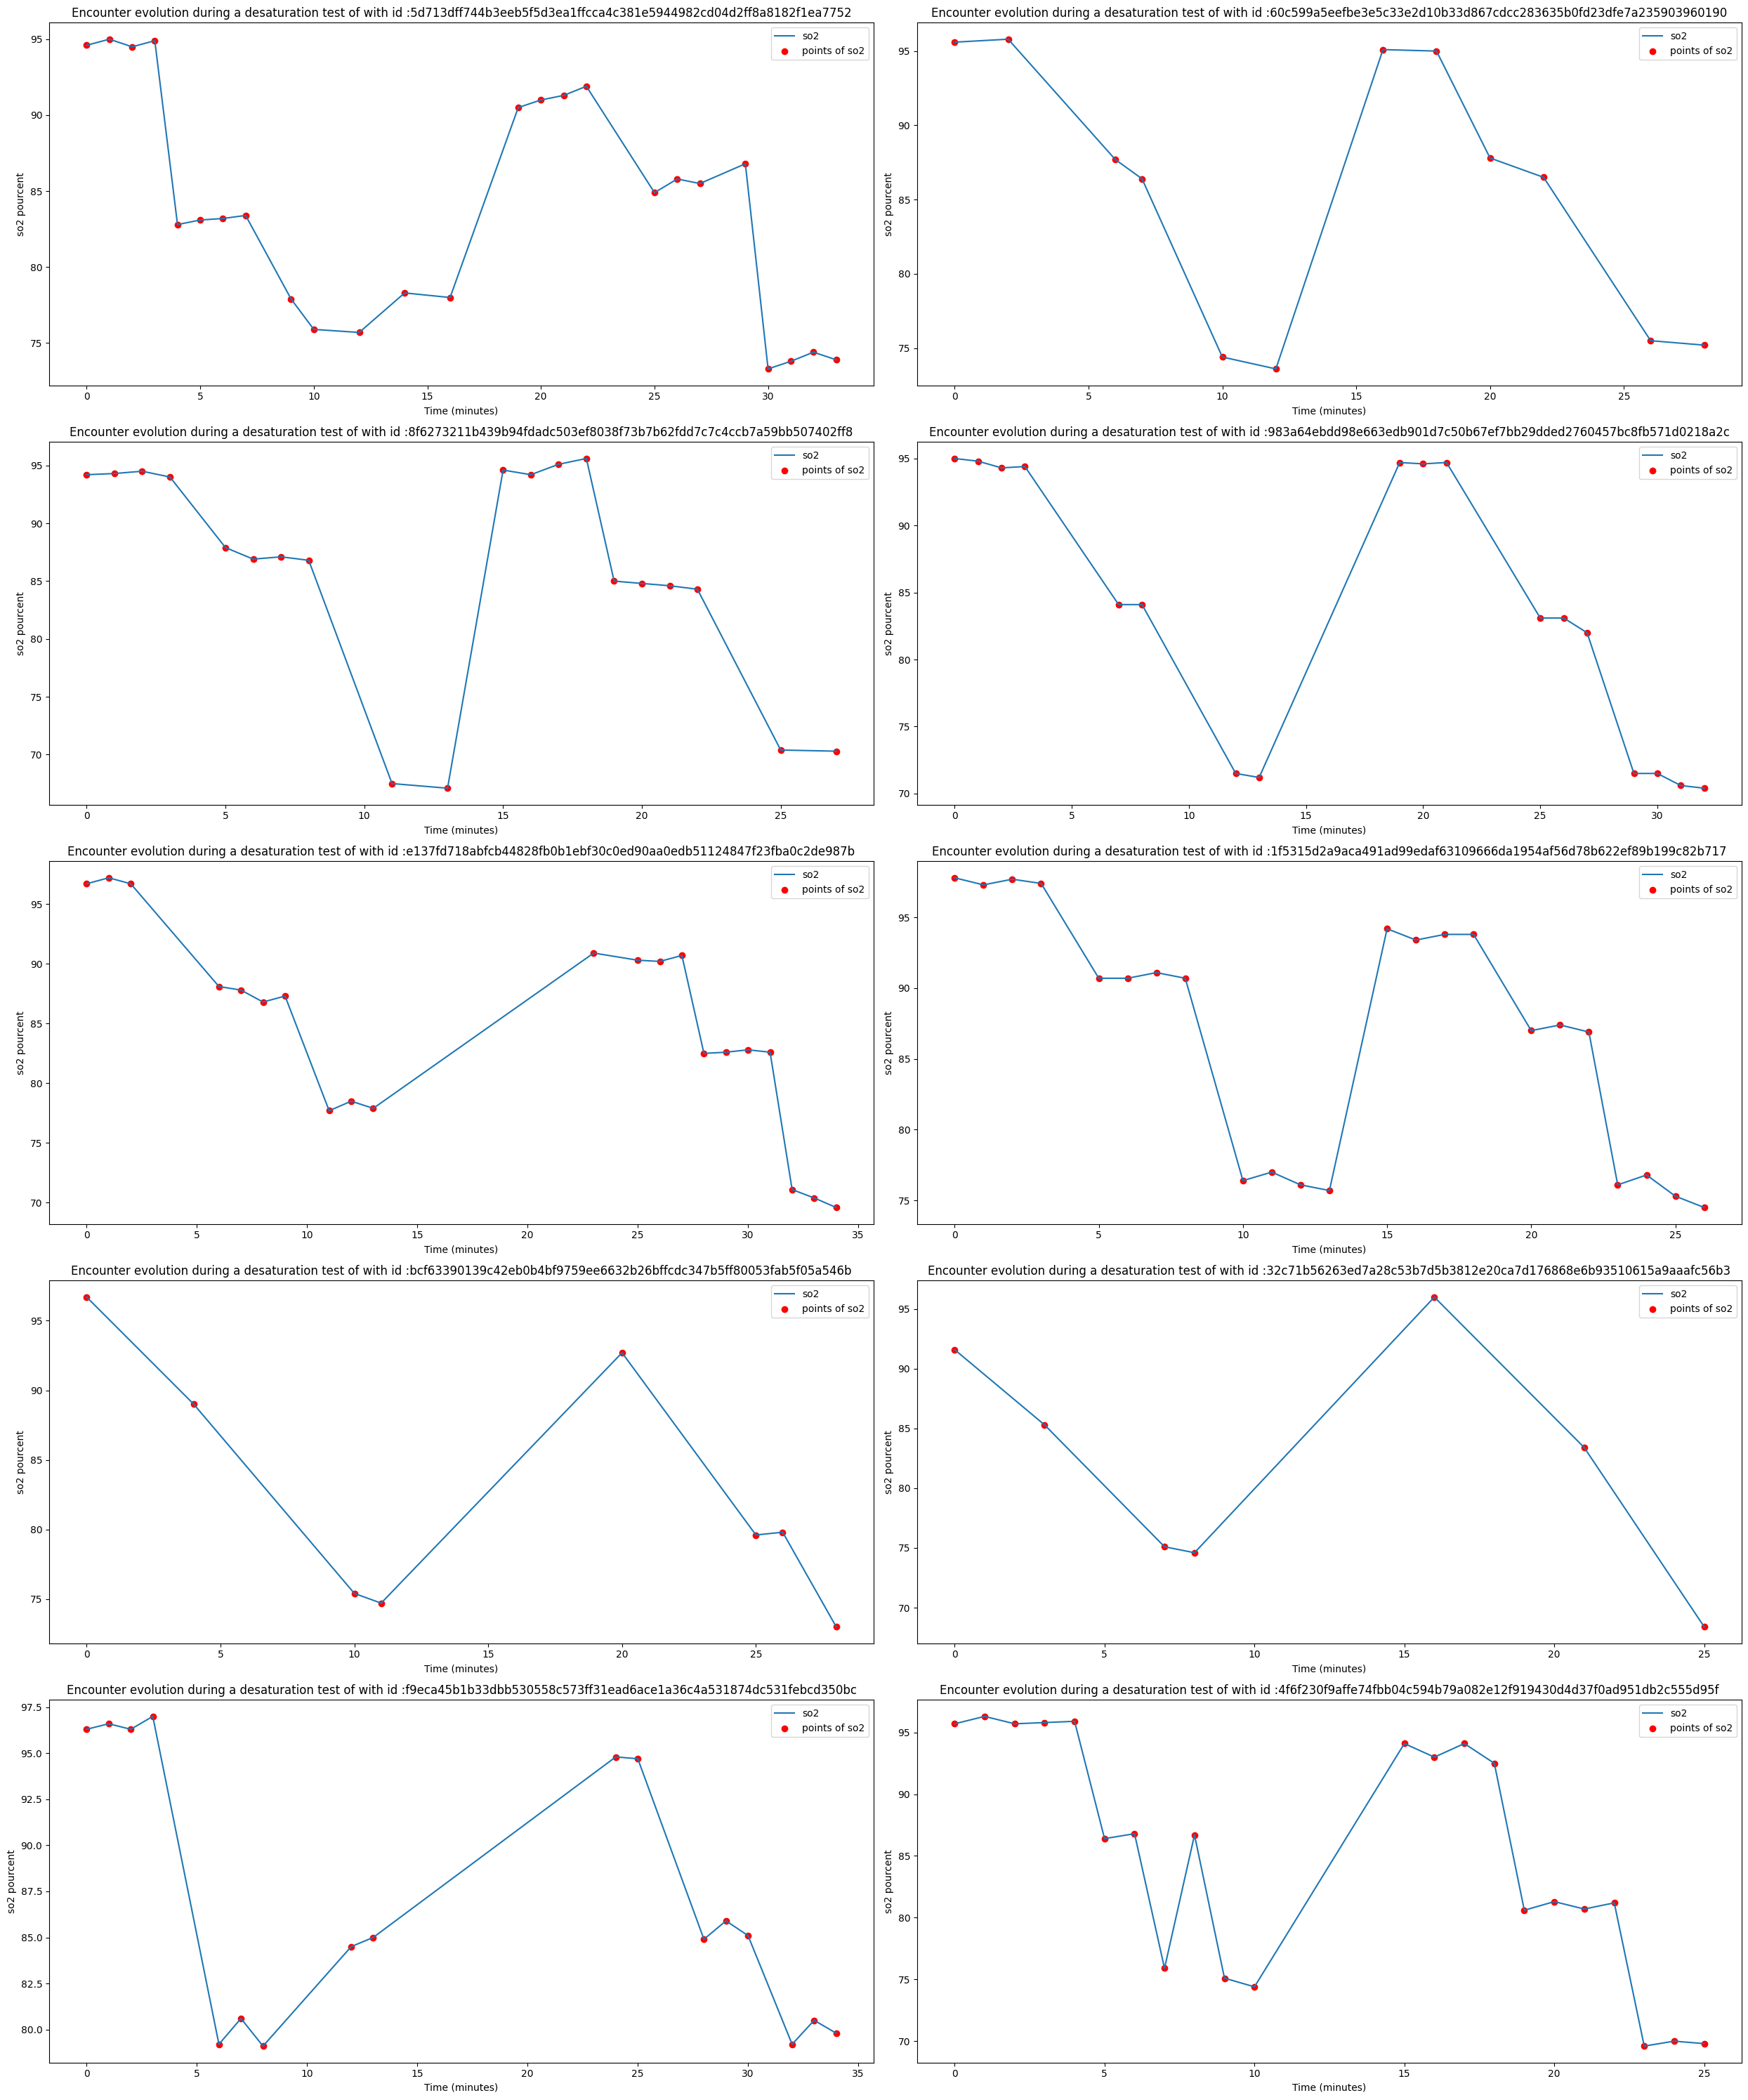

In [31]:
np.random.seed(0)

time_range = dataset.groupby('encounter_id')['datetime'].agg(['min', 'max']).reset_index()
time_range['duration'] = time_range['max'] - time_range['min']

percent25 = time_range['duration'].quantile(0.25)
percent75 = time_range['duration'].quantile(0.75)
time_range = time_range[(time_range['duration'] >= percent25) & (time_range['duration'] <= percent75)]

random_encounter = []

while len(random_encounter) < 10:
    encounter = np.random.choice(time_range['encounter_id'])
    if encounter not in random_encounter:
        random_encounter.append(encounter)

fig,axs = plt.subplots(5, 2, figsize=(25, 30))
axs = axs.flatten()
i = 0

for encounter in random_encounter:
    ax = axs[i]
    sample = dataset[dataset['encounter_id'] == encounter].sort_values(by='datetime')
    sample['datetime'] = pd.to_datetime(sample['datetime']) - sample['datetime'].min()
    ax.plot(sample['datetime'].dt.total_seconds() /60, sample['so2'], label='so2')
    ax.scatter(sample['datetime'].dt.total_seconds()/60, sample['so2'], label='points of so2', color='red')
    ax.legend()
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('so2 pourcent')
    ax.set_title(f'Encounter evolution during a desaturation test of with id :{encounter}')
    i += 1

plt.tight_layout()
plt.show()


Protocol : 
We are going to set a seed to repet the test and calculate the duration of the desaturation and only take between quartile(0.25) and quartile(0.75). After we are going to display the line form by the point and after the points to understand why the line will do that. 

We can see that the desaturation will follow a certain logic firstly we are going to start with a percentage over 90 most of the time near 95%. After we are going to have a phase where the saturation will decrease to a minimum local or global The time needs to reach this point will vary between 7 to 12. After this phase will follow a phase where the saturation will increase to a maximum (The maximum is reach between 15 and 20 minutes) and finally we are going to have a new decreasing phase 

Each encounter has different value for the maximum or the minimum and taking more or less time to transit between different states but in the average they look the same.


<div class="alert alert-success">
    
**Exercise**. Now, load the saturation data from `data/waveforms/{ENCOUNTER_ID[0]}/{ENCOUNTER_ID}_2hz.csv`. Then, also load the infrared PPG data from `data/waveforms/{ENCOUNTER_ID[0]}/{ENCOUNTER_ID}_ppg.dat` using the `wfdb` package.

Only focus on the first 17 minutes of the time series. Beware that they use different sampling frequencies.
    
</div>

(2041, 12)


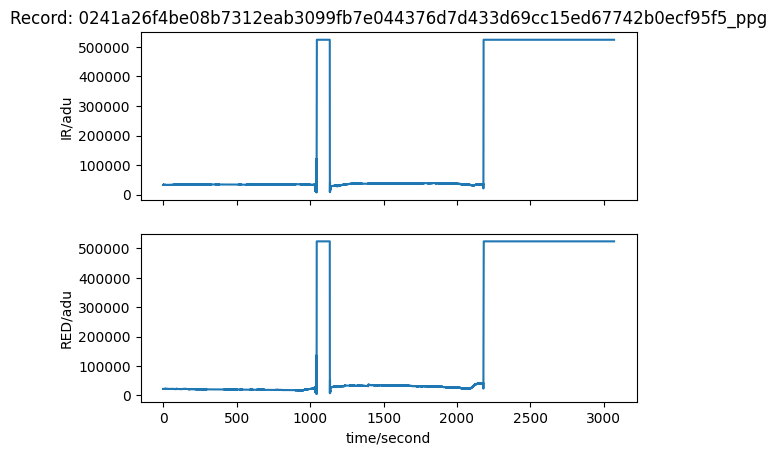

None
(87721, 3)
                           IR           RED
index                                      
0 days 00:00:00  33127.000000  21906.068966
0 days 00:00:01  33117.197674  21910.488372
0 days 00:00:02  33072.627907  21909.825581
0 days 00:00:03  33059.709302  21917.313953
0 days 00:00:04  32999.988372  21909.488372
...                       ...           ...
0 days 00:16:55  32766.127907  22470.081395
0 days 00:16:56  32847.011628  22527.616279
0 days 00:16:57  32896.395349  22556.093023
0 days 00:16:58  32937.558140  22592.395349
0 days 00:16:59  32958.162791  22624.383721

[1020 rows x 2 columns]
(1021, 11)


In [32]:
ENCOUNTER_ID = '0241a26f4be08b7312eab3099fb7e044376d7d433d69cc15ed67742b0ecf95f5'

saturation_csv = pd.read_csv('data/waveforms/0/'+ENCOUNTER_ID+'_2hz.csv', sep=',', decimal='.')
saturation_csv['Timestamp'] = pd.to_timedelta(saturation_csv['Timestamp'])
start_time = saturation_csv['Timestamp'][0]
end_time = start_time + pd.Timedelta(minutes=17)
saturation_csv = saturation_csv[(saturation_csv['Timestamp'] >= start_time) & (saturation_csv['Timestamp'] <= end_time)]
saturation_csv['Timestamp'] = saturation_csv['Timestamp']- start_time 

print(saturation_csv.shape)


saturation_dat = wf.rdrecord('data/waveforms/0/'+ENCOUNTER_ID+'_ppg', physical=False)
print(wf.plot_wfdb(saturation_dat))
saturation_dat = saturation_dat.to_dataframe()
saturation_dat =saturation_dat.reset_index()
saturation_dat['index'] = pd.to_timedelta(saturation_dat['index'])
saturation_dat = saturation_dat[(saturation_dat['index'] <= pd.Timedelta(minutes=17))]

print(saturation_dat.shape)
saturation_dat = saturation_dat.set_index('index')
saturation_dat = saturation_dat.resample('1S').mean()
saturation_csv = saturation_csv.set_index('Timestamp')
saturation_csv = saturation_csv.resample('1S').mean()

print(saturation_dat)
print(saturation_csv.shape)



Loading the ppg files and the csv files into dataframe and print the plot of the ppg to see what values are there.

Because they don't have the same frequency the 2 techniques was to take only one value for each second or transform it by the average of each second. I decided to take the average method.

<div class="alert alert-success">
    
**Exercise**. Knowing the sampling rates of the two time series, match them and plot them together on the same figure. Give your observations.

</div>

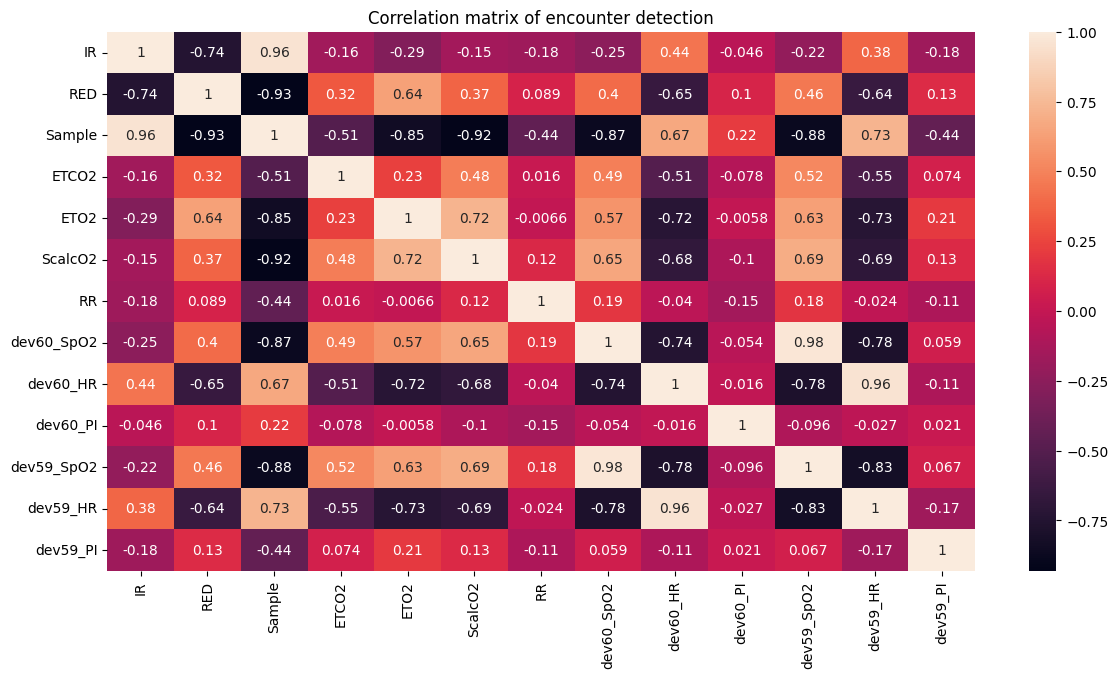

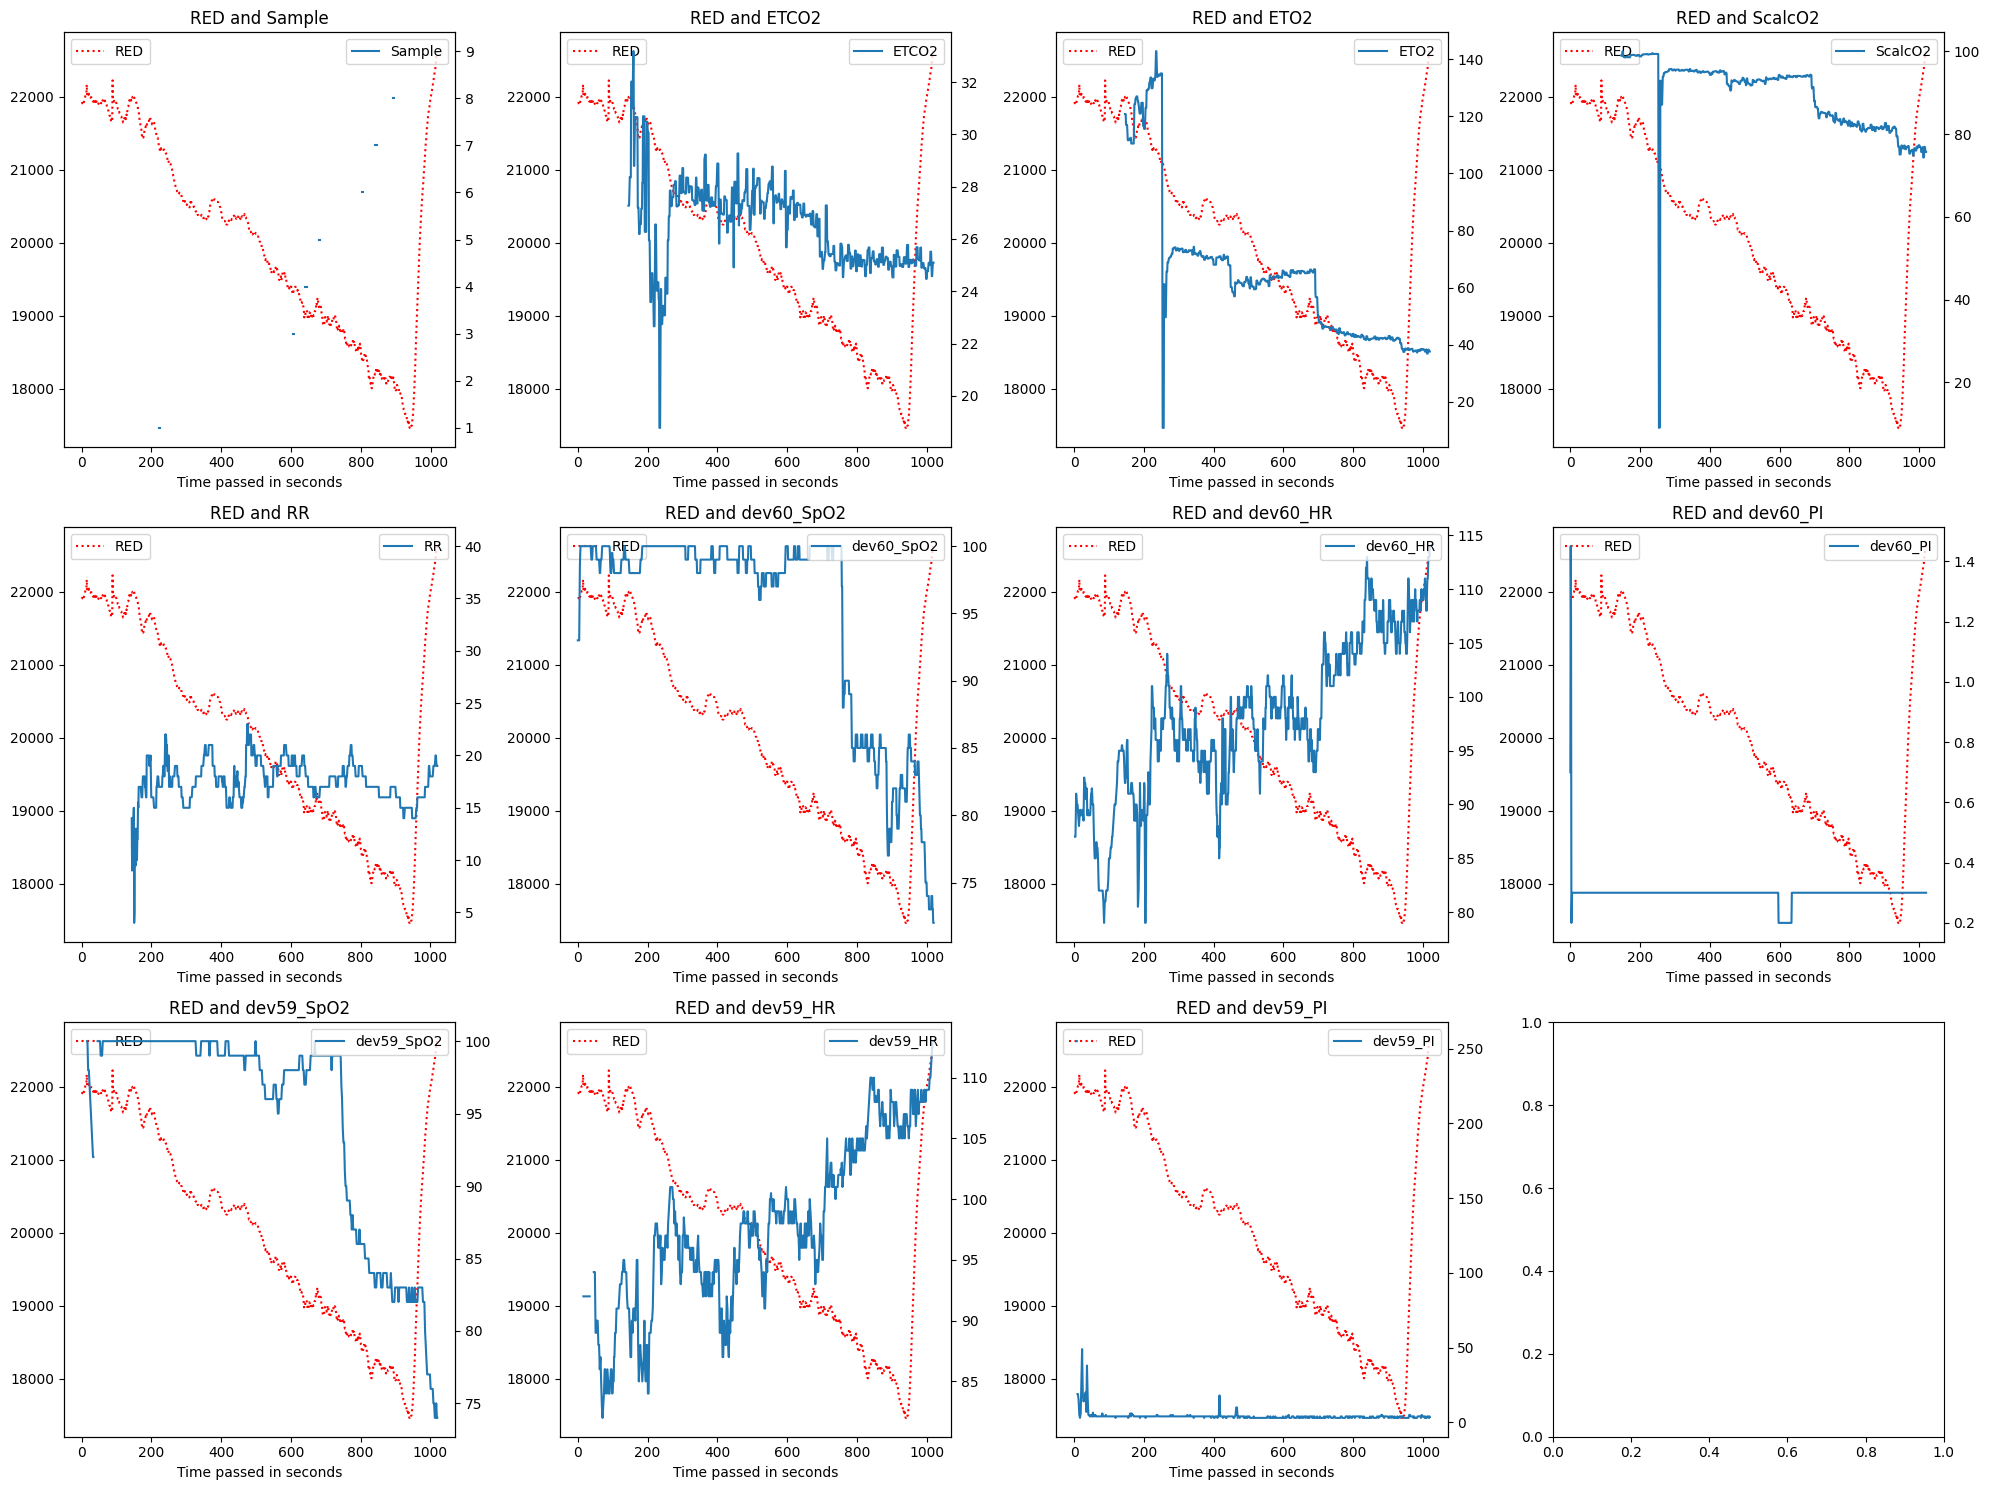

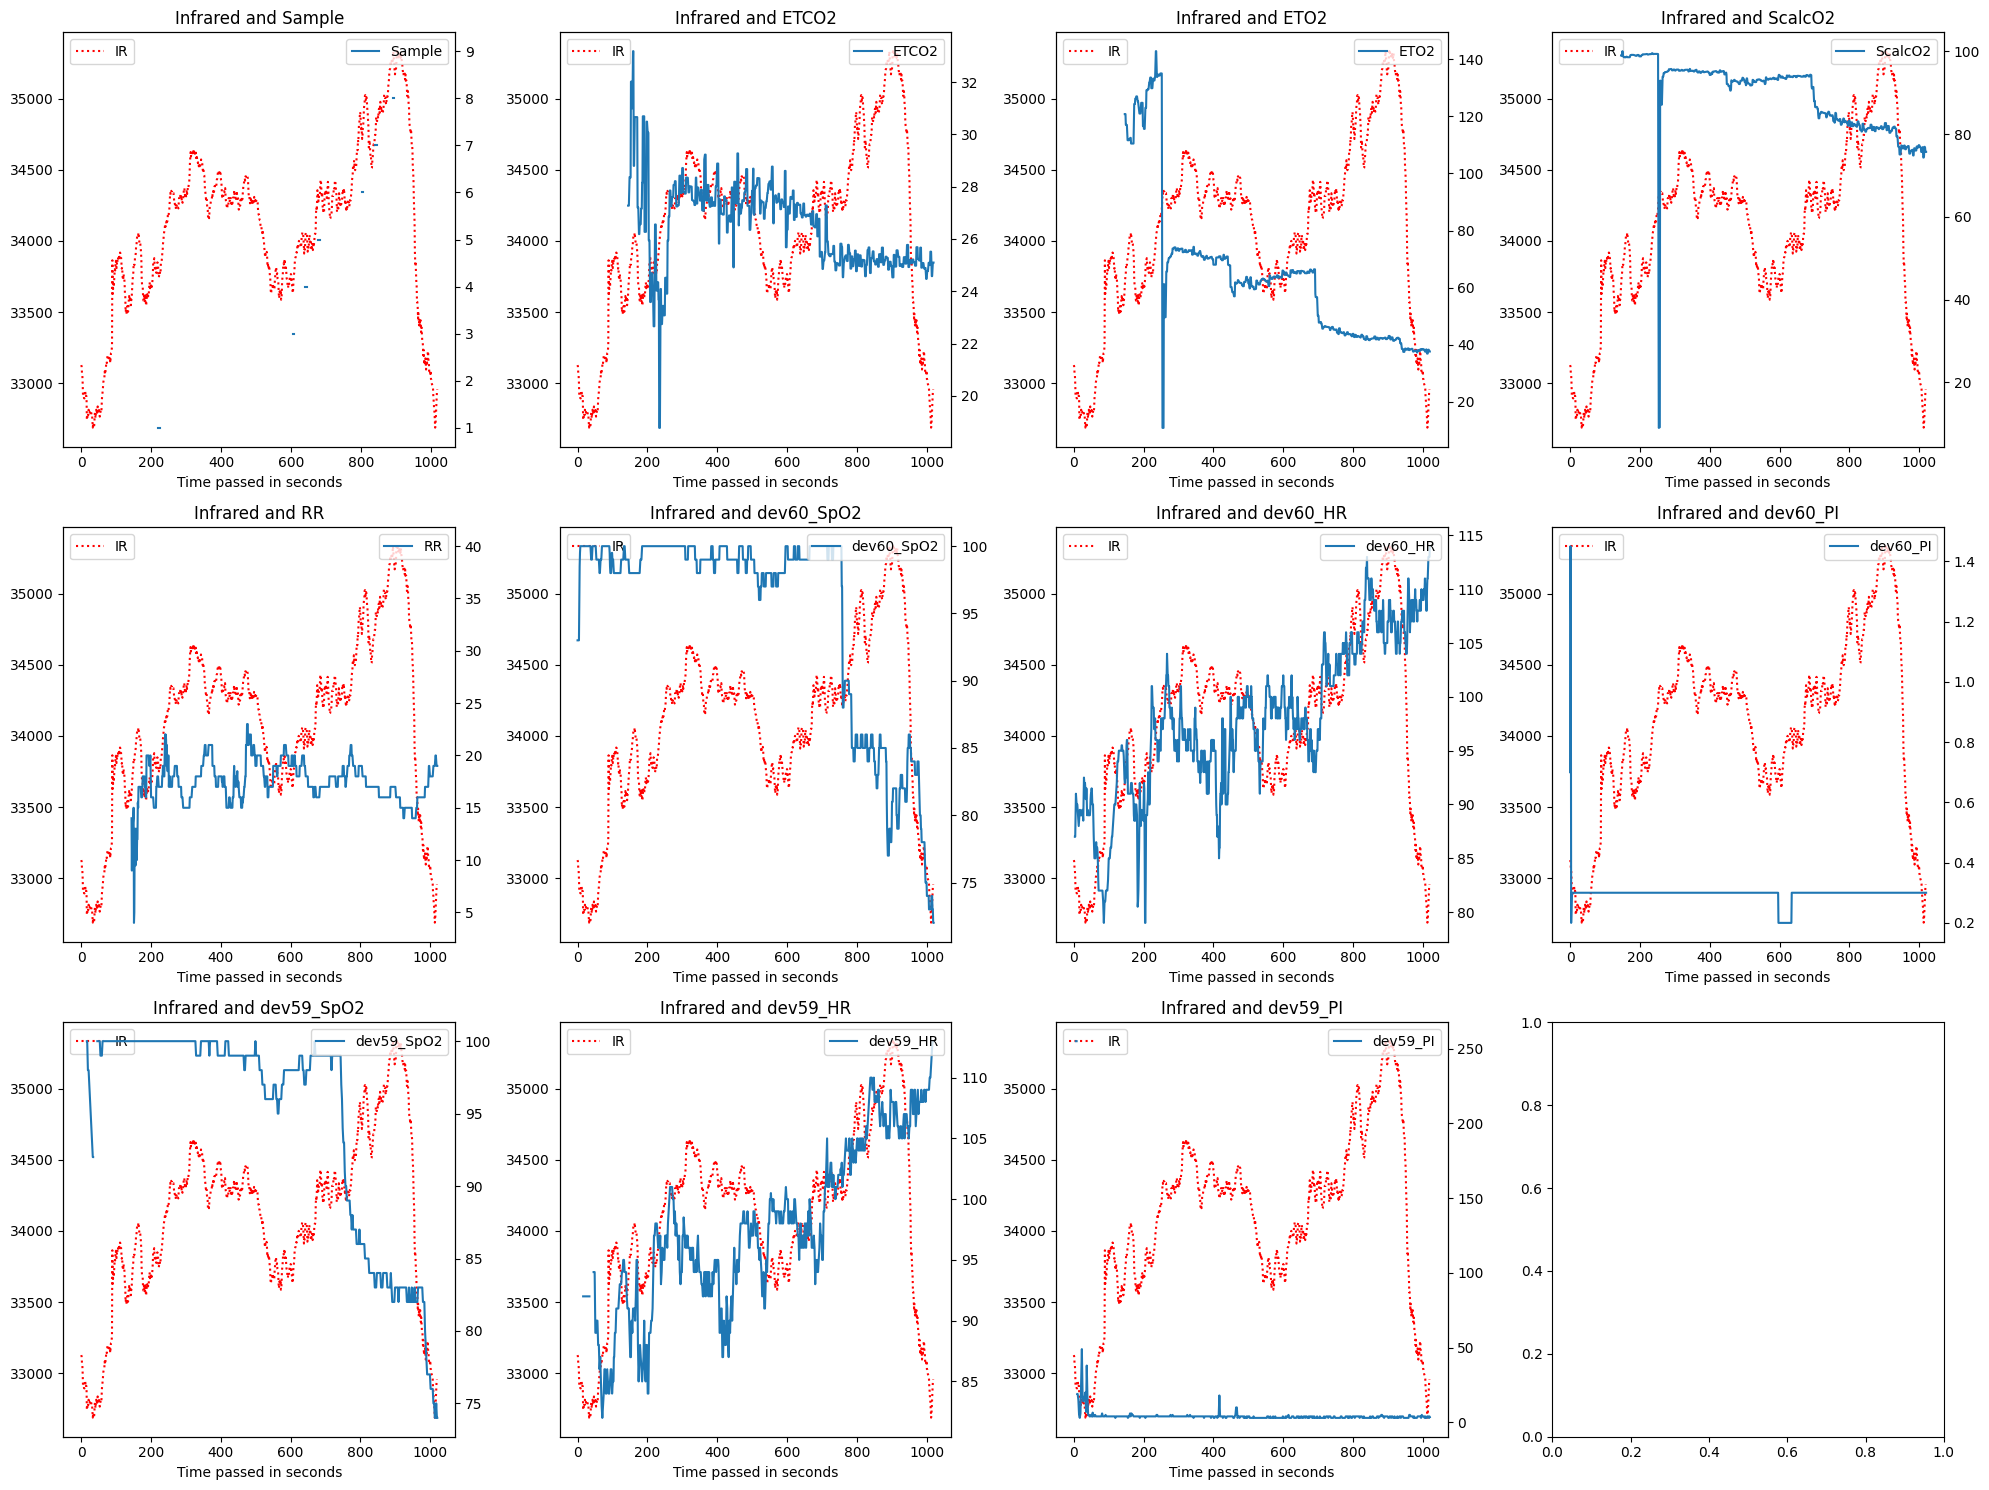

In [33]:
combined_df = pd.concat([saturation_dat, saturation_csv], axis=1)
correlation_matrix = combined_df.corr()


plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix of encounter detection')
plt.show()

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten() 

for i, column in enumerate(saturation_csv.columns):
    ax1 = axs[i]
    ax1.plot(saturation_dat.index / np.timedelta64(1, 's'), saturation_dat['RED'], color = 'red', label='RED', linestyle='dotted')
    ax1.set_xlabel('Time passed in seconds')
    ax2 = ax1.twinx()
    ax2.plot(saturation_csv.index / np.timedelta64(1, 's'), saturation_csv[column], label=column)
    ax1.set_title(f'RED and {column}')
    ax1.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten() 

for i, column in enumerate(saturation_csv.columns):
    ax1 = axs[i]
    ax1.plot(saturation_dat.index / np.timedelta64(1, 's'), saturation_dat['IR'],color = 'red', label='IR', linestyle='dotted')
    ax1.set_xlabel('Time passed in seconds')
    ax2 = ax1.twinx()
    ax2.plot(saturation_csv.index / np.timedelta64(1, 's'), saturation_csv[column], label=column)
    ax1.set_title(f'Infrared and {column}')
    ax1.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()




Let's first look at the correlation matrix to see what we can expect between the columns and in focus between Infrared or Red with the others. After this let's see what we are going to see in the plot what happens. We will work with a tool to work with SpO2 so we will focus between Infrared and dev59_SpO2. So we can see the values of correlation to have a first idea of 0.46 this is not very high but not very low. We can say there is some correlation and look in the details. SpO2 will remain high most of the time at 700 seconds, it will decrease relatively faster to reach around 1000 75 percent of saturation in oxygen. By looking at the Infrared graphics will do an increase phase with some very little decreasing phase. The first thing to look at is at around 500 when SpO2 will decrease the Infrared will do a phase of decreasing. After that the infrared will do an increasing phase and like I said before at 700 the SpO2 will decrease phase but the Infrared will continue to increase until 900 seconds and then the Infrared will dramatically decrease. So we can see a reflection of the SpO2 in the infrared but not just a part of it. Maybe Infrared needs some time and a threshold to detect those problems for a patient.